In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
file_path = 'Suicide_bombing_attacks.csv'  # Replace with your file path
df = pd.read_csv(file_path)

In [4]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [5]:
# Extract date-related features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M %p', errors='coerce').dt.hour

In [6]:
# Extract time of day
def get_time_of_day(time):
    if pd.isnull(time):
        return None
    try:
        hour = pd.to_datetime(time, format='%I:%M %p').hour
    except ValueError:
        return None
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

df['TimeOfDay'] = df['Time'].apply(get_time_of_day)

In [7]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Blast Day Type', 'Holiday Type', 'City', 'Province', 'Targeted Sect if any', 'TimeOfDay'], drop_first=True)

In [8]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

In [9]:
# Fill missing values
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':
        df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)
    else:
        df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12416\976960826.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12416\976960826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column].fillna(df_cleaned[column].media

# Temporal Analysis


In [10]:
# 1. Timeline: Plot attacks over time
fig1 = px.line(df_cleaned, x='Date', y='No. of Suicide Blasts', title='Timeline of Attacks Over Time')
fig1.show()

In [11]:
# 2. Heatmap by Day of Week & Hour
heatmap_data = df_cleaned.pivot_table(index='DayOfWeek', columns='Hour', values='No. of Suicide Blasts', aggfunc='sum')
fig2 = px.imshow(heatmap_data, title='Heatmap of Attacks by Day of Week & Hour')
fig2.show()

In [12]:
# 3. Islamic Date vs. Attacks
fig3 = px.histogram(df_cleaned, x='Islamic Date', title='Islamic Date vs. Attacks')
fig3.show()

# Location Analysis


In [13]:
df['Killed Max'] = pd.to_numeric(df['Killed Max'], errors='coerce')
df['Injured Max'] = pd.to_numeric(df['Injured Max'], errors='coerce')

# Drop rows with NaN values in 'Killed Max' or 'Injured Max'
df = df.dropna(subset=['Killed Max', 'Injured Max'])

# Plot attack locations on a map, color-coded by maximum casualties and size by maximum injured
fig = px.scatter_geo(df, 
                     lat='Latitude', 
                     lon='Longitude', 
                     color='Killed Max',  # Adjust column name if needed
                     size='Injured Max',  # Adjust column name if needed
                     hover_name='Location',   # Adjust column name if needed
                     hover_data=['Killed Max', 'Injured Max'],
                     title='Attack Locations by Casualties',
                     scope='asia',  # Limit map scope to Asia
                     projection='natural earth')  # Adjust projection as needed
fig.show()

# Attack Characteristics


In [14]:
# 10. Casualty Distribution
fig9 = px.box(df_cleaned, y='Killed Min', title='Distribution of Killed')
fig9.show()

fig10 = px.box(df_cleaned, y='Injured Min', title='Distribution of Injured')
fig10.show()

# Casualty Analysis


In [15]:
# 12. Killed vs. Injured
fig11 = go.Figure(data=[
    go.Bar(name='Killed', x=df_cleaned['Year'], y=df_cleaned['Killed Min']),
    go.Bar(name='Injured', x=df_cleaned['Year'], y=df_cleaned['Injured Min'])
])
fig11.update_layout(barmode='stack', title='Killed vs. Injured Over Time')
fig11.show()

# 13. Casualty Ratio
df_cleaned['Casualty Ratio'] = df_cleaned['Killed Min'] / df_cleaned['Injured Min']
fig12 = px.histogram(df_cleaned, x='Casualty Ratio', title='Distribution of Casualty Ratio')
fig12.show()

# Additional Visualizations


In [16]:
# 16. Scatter plot of Killed Min vs Injured Min
fig14 = px.scatter(df_cleaned, x='Killed Min', y='Injured Min', title='Scatter plot of Killed Min vs Injured Min')
fig14.show()

In [17]:
# Group by target type to find the most frequent types
target_types = df['Target Type'].value_counts().reset_index()
target_types.columns = ['target_type', 'count']

# Plot the most frequent target types
fig = px.bar(target_types, x='target_type', y='count', 
             title='Most Frequent Target Types', 
             labels={'target_type': 'Target Type', 'count': 'Frequency'})
fig.show()


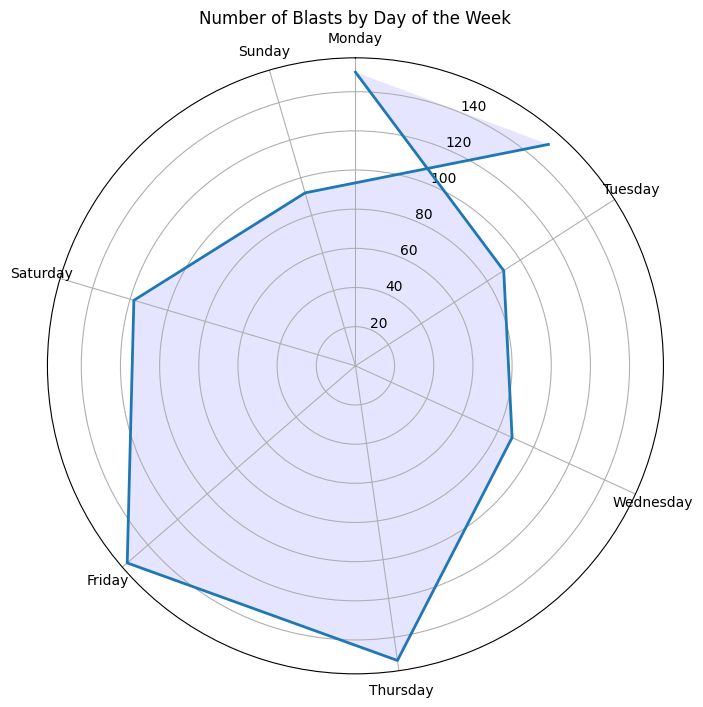

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Extract day of the week from the date
df['day_of_week'] = pd.to_datetime(df['Date']).dt.day_name()

# Aggregate the data by day of the week
day_counts = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).fillna(0)

# Prepare data for Radar Chart
categories = list(day_counts.index)
values = day_counts.values.tolist()
values += values[:1]  # To complete the loop

# Create the Radar Chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(range(len(categories)), categories)
ax.plot(range(len(categories) + 1), values, linewidth=2, linestyle='solid')
ax.fill(range(len(categories) + 1), values, 'b', alpha=0.1)
plt.title('Number of Blasts by Day of the Week')
plt.show()


In [20]:
df_cleaned.describe().T

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning:

invalid value encountered in subtract



,count,mean,min,25%,50%,75%,max,std
Date,522,2010-04-30 09:44:49.655172352,1995-11-19 00:00:00,2008-10-31 12:00:00,2009-12-24 00:00:00,2011-11-17 12:00:00,2016-05-30 00:00:00,NaN
Latitude,522.0,32.580081,24.879503,31.8238,33.5833,34.0043,35.3833,2.485035
Killed Min,522.0,12.772031,0.0,5.0,8.0,14.0,125.0,15.201517
Killed Max,522.0,15.559968,0.0,3.0,8.0,18.0,148.0,20.869644
Injured Min,522.0,28.542146,0.0,10.0,20.0,29.75,320.0,34.167915
No. of Suicide Blasts,522.0,1.095785,1.0,1.0,1.0,1.0,4.0,0.364475
Temperature(C),522.0,21.387605,-2.37,15.075,21.9475,28.35125,44.0,8.439283
Temperature(F),522.0,70.442874,27.734,59.135,71.411,82.859,111.0,15.144656
Year,522.0,2009.775862,1995.0,2008.0,2009.0,2011.0,2016.0,2.644219
Month,522.0,6.494253,1.0,4.0,6.0,9.75,12.0,3.408942
